In [1]:
!ls

'Analytics_backup on 17 Feb 2020.py'   steps_dead.txt
 Analytics.py			       steps_stationarity_backup.txt
 da1.ipynb			       steps_stationarity.txt
 __init__.py			       steps_test.txt
 OldData			       steps_train_backup.txt
 pca.ipynb			       steps_train.txt
 __pycache__			       TimeSeries.ipynb
'PyOD .ipynb'			       Untitled.ipynb


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('steps_train.txt', skiprows=1, header=None, usecols=[1,2])

In [4]:
df.head()

,1,2
0,-0.00,0.00
1,-0.20,-0.01
2,-0.25,0.32
3,-0.27,1.14
4,-0.80,2.06


In [5]:
import matplotlib.pyplot as plt

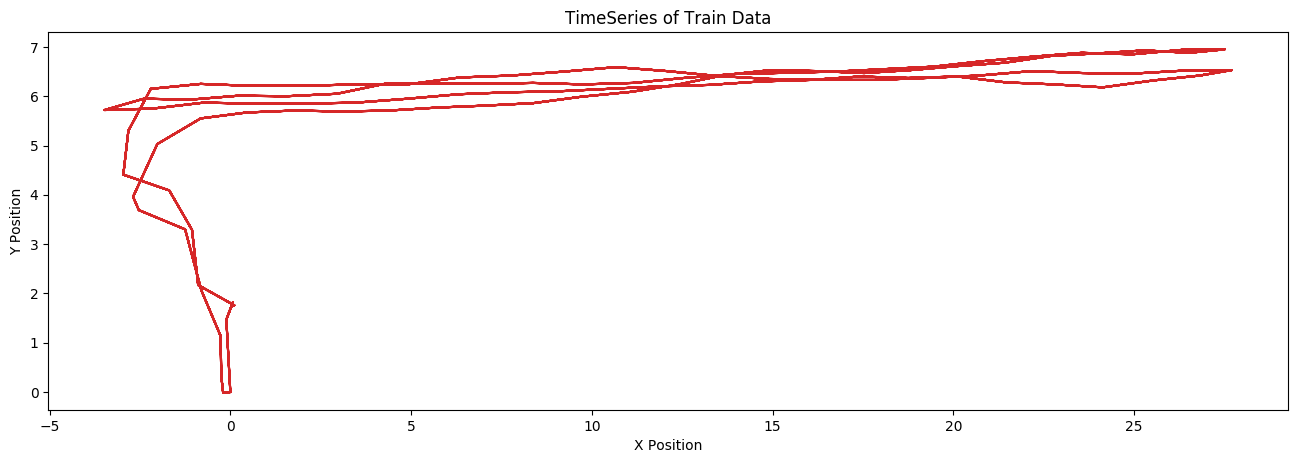

In [6]:
# Draw Plot
def plot_df(df, x, y, title="TimeSeries", xlabel='X Position', ylabel='Y Position', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df[1], y=df[2], title='TimeSeries of Train Data') 

In [7]:
import numpy as np
import pandas as pd
from scipy.linalg import hankel, eigh
from matplotlib import pyplot as plt
from matplotlib import style

In [8]:
X_train_data = (df[1]+df[2])/2

In [9]:
X_train_data

0      0.000
1     -0.105
2      0.035
3      0.435
4      0.630
       ...  
744    0.640
745    0.935
746    0.890
747    0.945
748    0.680
Length: 749, dtype: float64

In [10]:
N = len(X_train_data)
# L = N // 2
L = 15
X_train = hankel(X_train_data[:L],X_train_data[L-1:]) # Creating trajectory matrix

In [11]:
X_train.shape

(15, 735)

Text(0.5, 0, 'Cardinal Number of Eigen value ->')

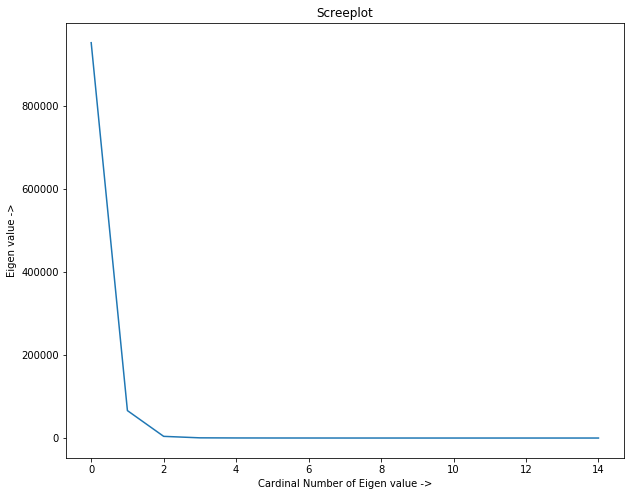

In [12]:
eigenValues, eigenVectors = eigh(np.matmul(X_train, X_train.T))
idx = eigenValues.argsort()[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
# Sree plot
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(eigenValues[0:])
ax.set_title("Screeplot")
ax.set_ylabel("Eigen value ->")
ax.set_xlabel("Cardinal Number of Eigen value ->")

In [13]:
# From the above scree plot, it is seen that the first eigen value is more 
# significant and the other eigen values are close to zero. Thus we choose r as 1
# and then we compute the U for projection and centroid in the signal subspace
r = 1
# Extracted Training signals
U, Sigma, V = np.linalg.svd(X_train)
V = V.T
# d = np.linalg.matrix_rank(X_train)
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,r)] )
X_train_extracted = X_elem.sum(axis=0)
X_train_extracted_data = np.asarray(list(X_train_extracted[:,0]) + list(X_train_extracted[:,-1]))

U = eigenVectors[:,:r] # r as statistical dimension
UT = U.T
pX = np.matmul(UT,X_train_extracted)
centroid = np.mean(pX, axis=1)
centroid = centroid[:,np.newaxis]

In [14]:
# Calculating the departure threshold in signal subspace using centroid and UT

# #For training phase
# Xtrg = hankel(X_train_data[:L], X_train_data[L-1:])
# pXtrg = np.matmul(UT,Xtrg)
# dtrg_matrix = centroid - pXtrg
# dtrg_scores = np.linalg.norm(dtrg_matrix, axis=0, ord=2)

# For Validation phase and threshold calculation
Xt = hankel(X_train_data[:L],X_train_data[L-1:])
pXt = np.matmul(UT,Xt)
dt_matrix = centroid - pXt
dt_scores = np.linalg.norm(dt_matrix, axis=0, ord=2)
# d_scores = np.asarray([np.matmul(d_matrix[:,i].T, d_matrix[:,i]) for i in range(d_matrix.shape[1])])
np.max(dt_scores)


28.737554221456644

In [15]:
np.min(dt_scores)

0.6906937142109193

In [16]:
range(len(dt_scores))

range(0, 735)

In [17]:
# Import data
# df = pd.read_csv('datasets/AirPassengers.csv', parse_dates=['date'])
def PlotThresholdArea(y1, title='Threshold Area'):
    x = range(len(y1))
    
    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
    plt.ylim(-100, 100)
    plt.title(title, fontsize=16)
    plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
    plt.show()

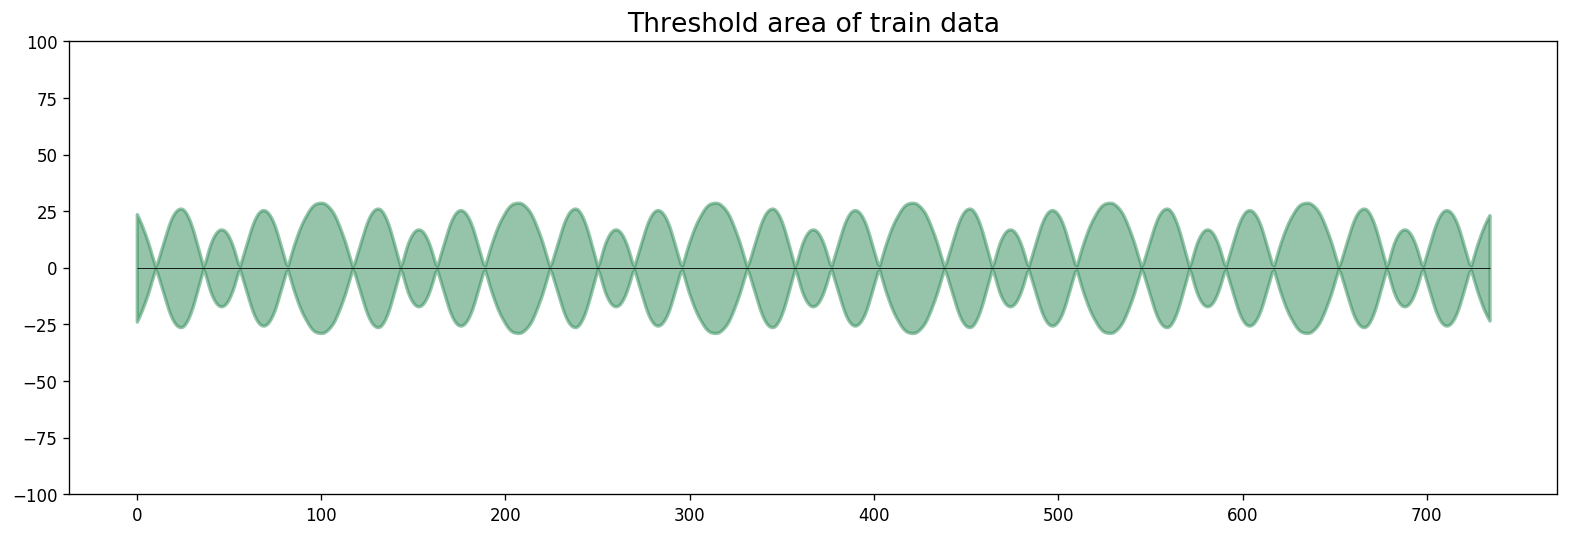

In [18]:
PlotThresholdArea(dt_scores, title='Threshold area of train data')

### Testing positional Deviation

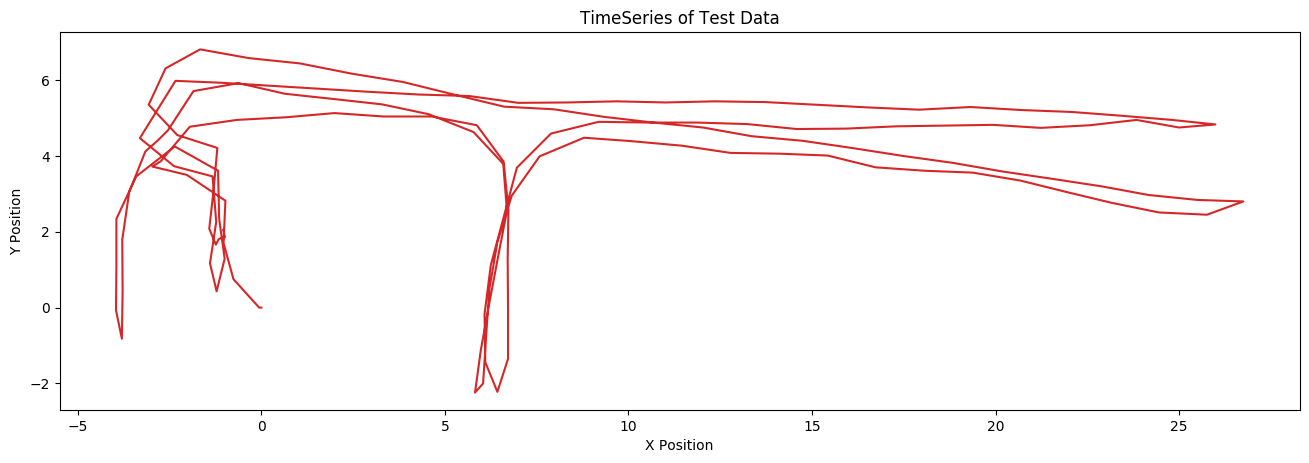

In [19]:
df_test = pd.read_csv('steps_test.txt', skiprows=1, header=None, usecols=[1,2])
plot_df(df, x=df_test[1], y=df_test[2], title='TimeSeries of Test Data') 

In [20]:
X_test = (df_test[1]+df_test[2])/2

In [21]:
Xj = hankel(X_test[:L],X_test[L-1:])
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
# dj_scores = [np.matmul(dj_matrix[:,i].T, dj_matrix[:,i]) for i in range(dj_matrix.shape[1])]
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

32.93122291817749

In [22]:
len(dj_scores)

135

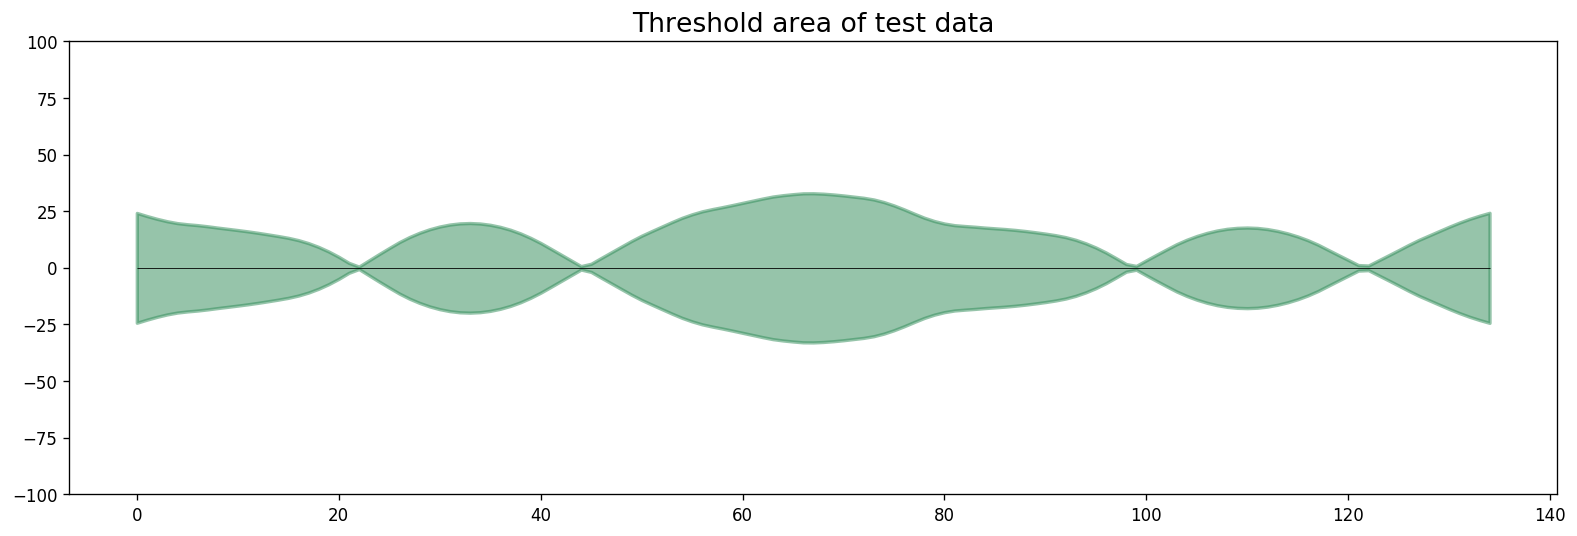

In [23]:
PlotThresholdArea(dj_scores, title='Threshold area of test data')

### Test for stationarity


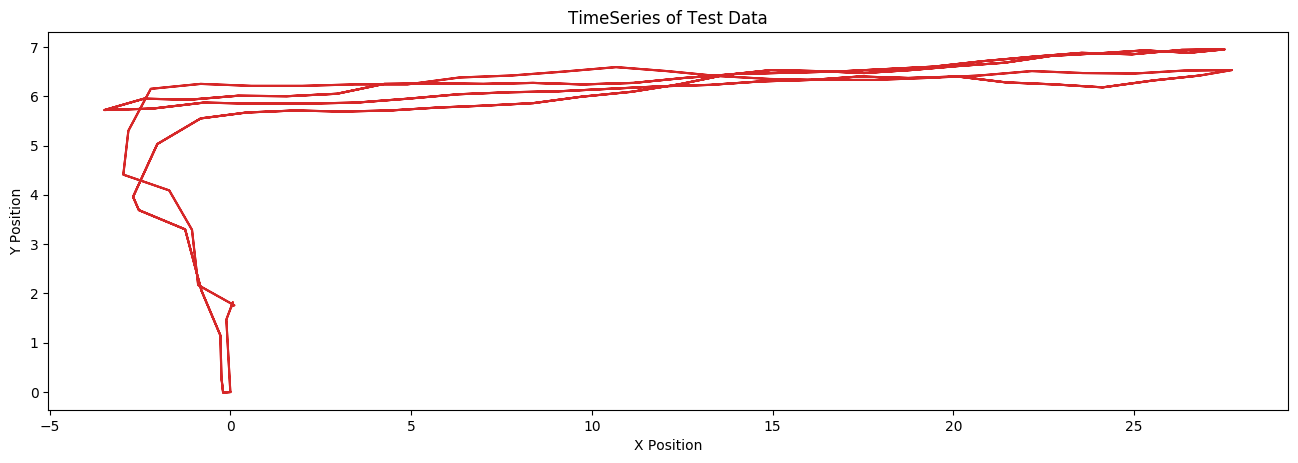

In [24]:
df_test = pd.read_csv('steps_stationarity.txt', skiprows=1, header=None, usecols=[1,2])
plot_df(df, x=df_test[1], y=df_test[2], title='TimeSeries of Test Data')

In [25]:
X_test = (df_test[1]+df_test[2])/2
Xj = hankel(X_test[:L],X_test[L-1:])
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
# dj_scores = [np.matmul(dj_matrix[:,i].T, dj_matrix[:,i]) for i in range(dj_matrix.shape[1])]
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

33.140362991488445

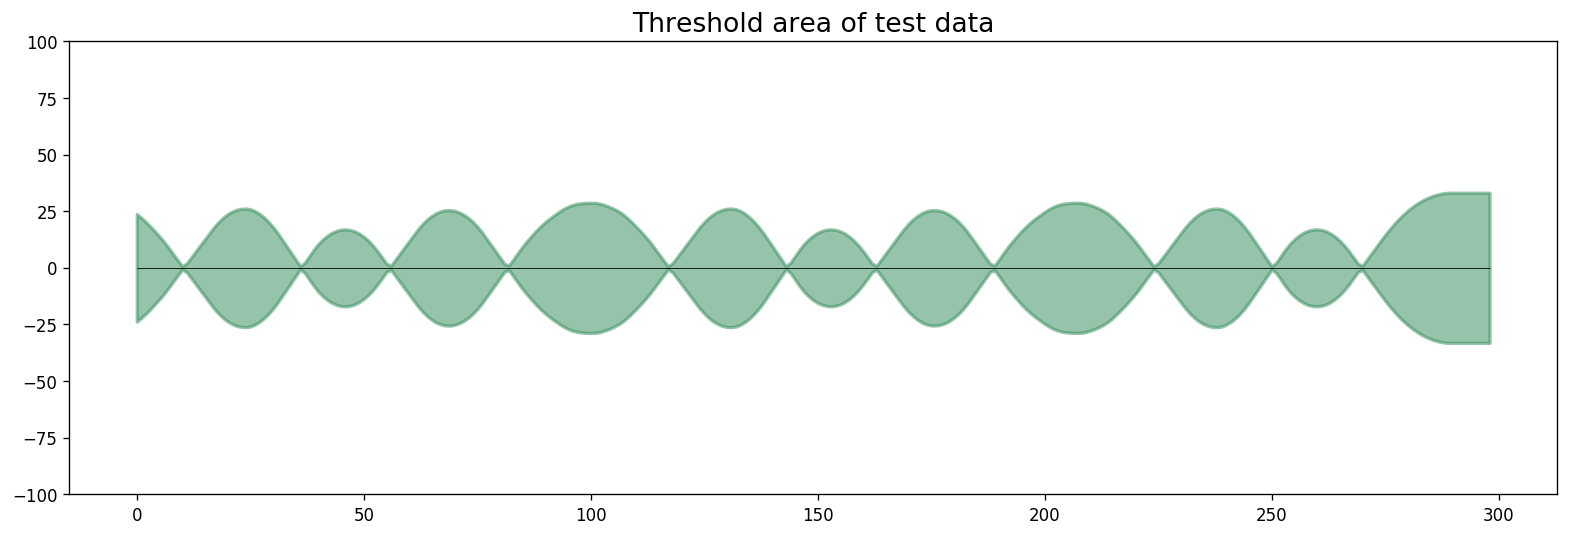

In [26]:
PlotThresholdArea(dj_scores, title='Threshold area of test data')